In [63]:
import matplotlib.pyplot as plt
import os
import json
import numpy as np
from prettytable import PrettyTable

In [64]:
def read_experiment_data(folder_path, filename):
    file_path = os.path.join(folder_path, filename)
    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            data = json.load(file)
    else:
        print(f"File '{filename}' does not exist.")
    return data

def read_all_experiments_data(folder_path):
    combined_data = {}
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
            key = os.path.splitext(filename)[0]
            combined_data[key] = data
    return combined_data

In [65]:
def print_combined_table(combined_data):
    table = PrettyTable()
    table.field_names = ["Scenario", "Arrival Rate", "Avg Time Spent", "Exact Avg Time", "Max Time Spent", "Avg Queue Size"]
    scenarios = ['s1_uss', 's1_uss_d1', 's1_uss_d2', 's1_uss_d3', 's1_uss_d5',
                 's2_uss_different_1', 's2_uss_d1_different_1', 's2_uss_d2_different_1', 's2_uss_d3_different_1', 's2_uss_d5_different_1', 
                 's2_uss_different_2', 's2_uss_d1_different_2', 's2_uss_d2_different_2', 's2_uss_d3_different_2', 's2_uss_d5_different_2', 
                 's2_uss_different_3', 's2_uss_d1_different_3', 's2_uss_d2_different_3', 's2_uss_d3_different_3', 's2_uss_d5_different_3']
    d_choices = [0, 1, 2, 3, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    
    for scenario, d in zip(scenarios, d_choices):
        table.add_row([scenario, '', '', '', '', ''])
        
        for arrival_rate, lambd in zip(['0.5', '0.7', '0.8', '0.9', '0.95', '0.99', '0.999'], [0.5, 0.7, 0.8, 0.9, 0.95, 0.99, 0.999]):
            exact_avg_time_spent = 0
            
            for i in range(1, 100):
                if d == 0:
                    exact_avg_time_spent = 0
                elif d == 1:
                    exact_avg_time_spent = (1.0 / (1.0 - lambd))
                else:
                    exact_avg_time_spent += (lambd ** (((d ** (i) - d)) / (d - 1)))
            
            avg_time_spent = np.mean(combined_data[scenario][arrival_rate]['avg_time_spent'])
            max_time_spent = np.mean(combined_data[scenario][arrival_rate]['max_time_spent'])
            avg_queue_size = np.mean(combined_data[scenario][arrival_rate]['avg_queue_size'])
            table.add_row(['', arrival_rate, avg_time_spent, exact_avg_time_spent, max_time_spent, avg_queue_size])
        table.add_row(['', '', '', '', '', ''])
    
    table.align = "r"
    table.float_format = ".4"
    print(table)    

In [66]:
def plot_combined(combined_data, arrival_rate, scenario):
    if scenario == 's1_uss':
        scenarios = ['s1_uss', 's1_uss_d1', 's1_uss_d2', 's1_uss_d3', 's1_uss_d5']
    elif scenario == 's2_uss_different_1':
        scenarios = ['s2_uss_different_1', 's2_uss_d1_different_1', 's2_uss_d2_different_1', 's2_uss_d3_different_1', 's2_uss_d5_different_1']
    elif scenario == 's2_uss_different_2':
        scenarios = ['s2_uss_different_2', 's2_uss_d1_different_2','s2_uss_d2_different_2', 's2_uss_d3_different_2', 's2_uss_d5_different_2']
    elif scenario == 's2_uss_different_3':
        scenarios = ['s2_uss_different_3', 's2_uss_d1_different_3', 's2_uss_d2_different_3', 's2_uss_d3_different_3', 's2_uss_d5_different_3']

    labels = ['Jednostajny', 'd = 1', 'd = 2', 'd = 3', 'd = 5', 'Jednostajny', 'd = 1', 'd = 2', 'd = 3', 'd = 5', 'Jednostajny ', 'd = 2', 'd = 3', 'd = 5' ]

    for s, label in zip(scenarios, labels):
        plt.plot(combined_data[s][arrival_rate]['num_servers'], combined_data[s][arrival_rate]['avg_time_spent'], label=label)

    plt.xticks(fontproperties='Arial', fontsize=9)
    plt.yticks(fontproperties='Arial', fontsize=9)
    plt.xlabel('Liczba serwerów', fontsize='9')
    plt.ylabel('Średni czas spędzony w systemie', fontsize='9')
    plt.legend(fontsize='9')
    plt.show()


def plot_histogram(combined_data, arrival_rate, servers_speed):
    if servers_speed == 'different_1':
        scenarios = ['s2_uss_d1_different_1', 's2_uss_d2_different_1']
    elif servers_speed == 'different_2':
        scenarios = ['s2_uss_d1_different_2', 's2_uss_d2_different_2']
    elif servers_speed == 'different_3':
        scenarios = ['s2_uss_d1_different_3', 's2_uss_d2_different_3']

    for s in scenarios:
        data = combined_data[s][arrival_rate]['server_utilization']['20']
        bins = [i for i in range(1, len(data) + 1)]
        plt.bar(bins, data)

        plt.xticks(fontproperties='Arial', fontsize=9)
        plt.yticks(fontproperties='Arial', fontsize=9)
        plt.xlabel('Numer serwera', fontsize='9')
        plt.ylabel('Wykorzystanie serwera', fontsize='9')
        plt.show()

In [67]:
path_table = './experiments/1.0_100000_100_10/table'
path_plot = './experiments/1.0_30000_100_10/plot'
path_histogram = './experiments/1.0_30000_20_10/histogram'

# Table

In [17]:
print_combined_table(read_all_experiments_data(path_table))

+-----------------------+--------------+----------------+----------------+----------------+----------------+
|              Scenario | Arrival Rate | Avg Time Spent | Exact Avg Time | Max Time Spent | Avg Queue Size |
+-----------------------+--------------+----------------+----------------+----------------+----------------+
|                s1_uss |              |                |                |                |                |
|                       |          0.5 |         1.9906 |              0 |        21.0796 |         0.9914 |
|                       |          0.7 |         3.3349 |              0 |        32.1043 |         2.3263 |
|                       |          0.8 |         4.8086 |              0 |        39.3439 |         3.8081 |
|                       |          0.9 |         9.2313 |              0 |        66.3380 |         8.2065 |
|                       |         0.95 |        14.5264 |              0 |        91.8683 |        13.4617 |
|                  

# Plots

## Identyczne serwery i zadania

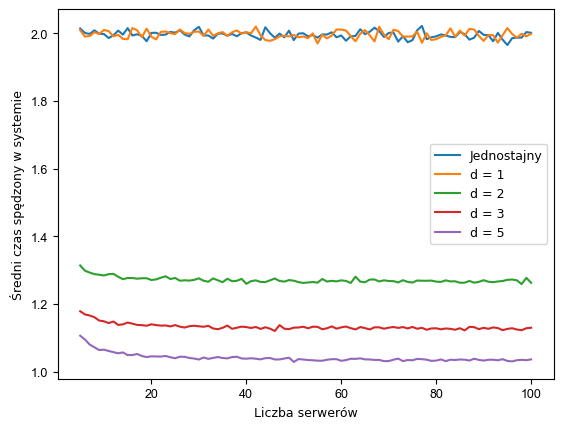

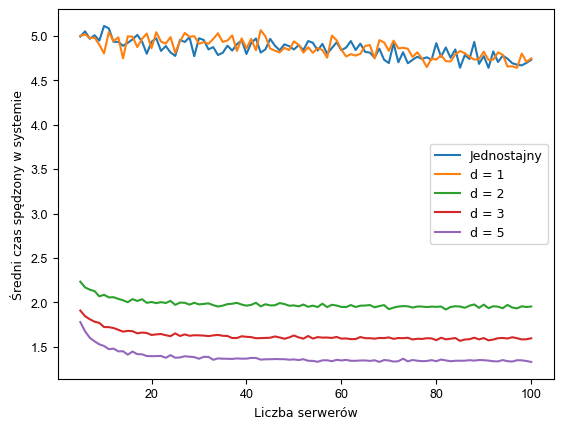

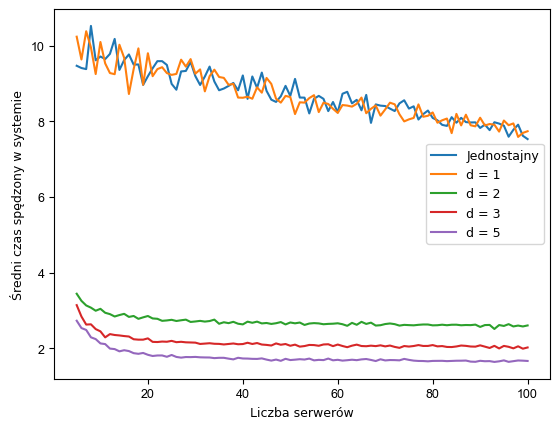

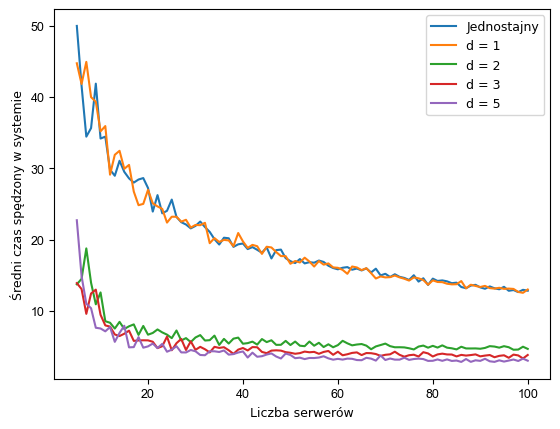

In [33]:
plot_combined(read_all_experiments_data(path_plot), '0.5', 's1_uss')
plot_combined(read_all_experiments_data(path_plot), '0.8', 's1_uss')
plot_combined(read_all_experiments_data(path_plot), '0.9', 's1_uss')
plot_combined(read_all_experiments_data(path_plot), '0.99', 's1_uss')

## Serwery o różnej szybkości, takie same zadania

### Serice_rates = 2^i

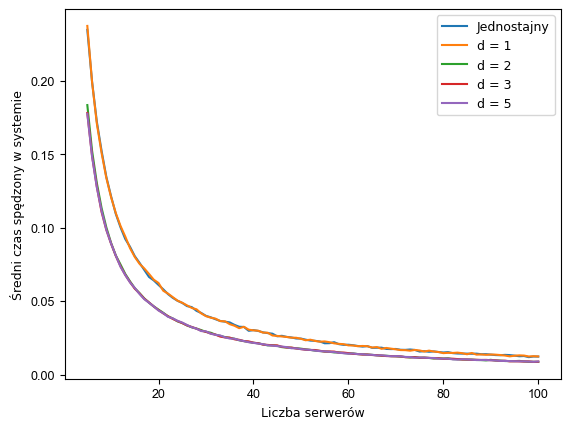

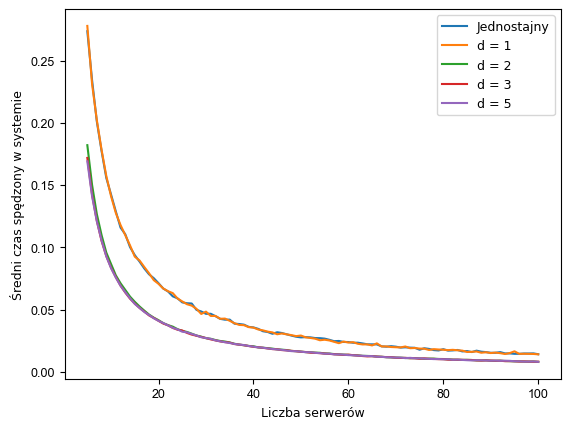

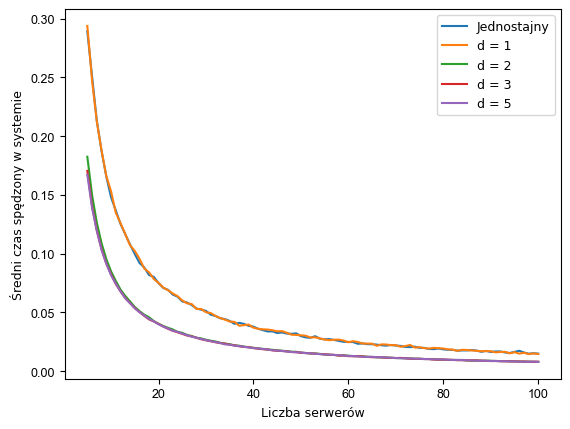

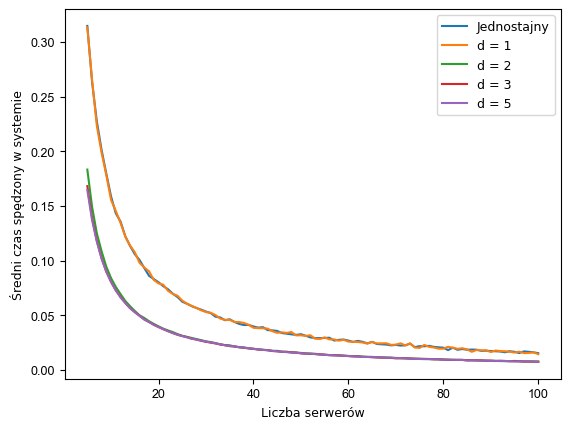

In [34]:
plot_combined(read_all_experiments_data(path_plot), '0.5', 's2_uss_different_1')
plot_combined(read_all_experiments_data(path_plot), '0.8', 's2_uss_different_1')
plot_combined(read_all_experiments_data(path_plot), '0.9', 's2_uss_different_1')
plot_combined(read_all_experiments_data(path_plot), '0.99', 's2_uss_different_1')

### Service_rates = i

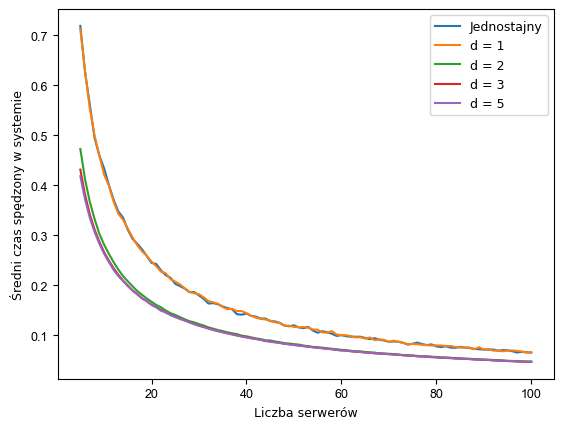

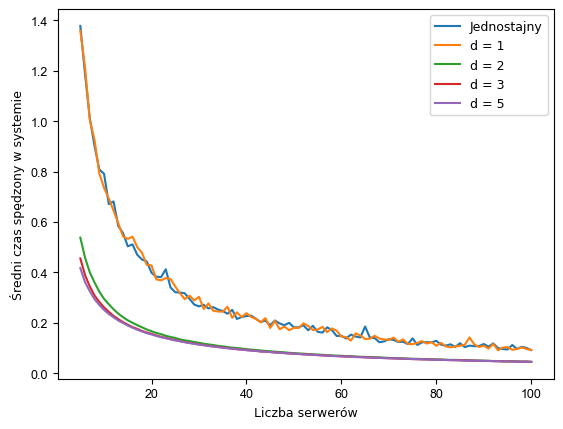

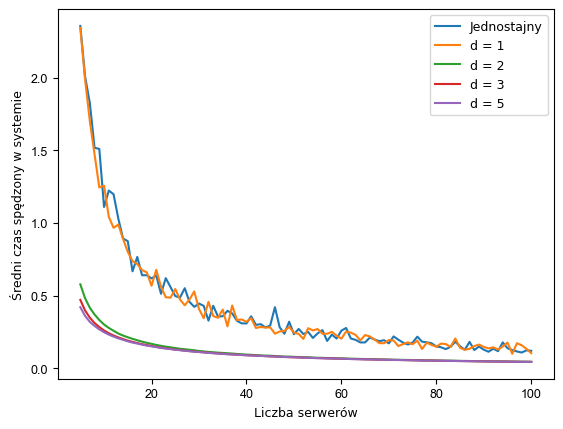

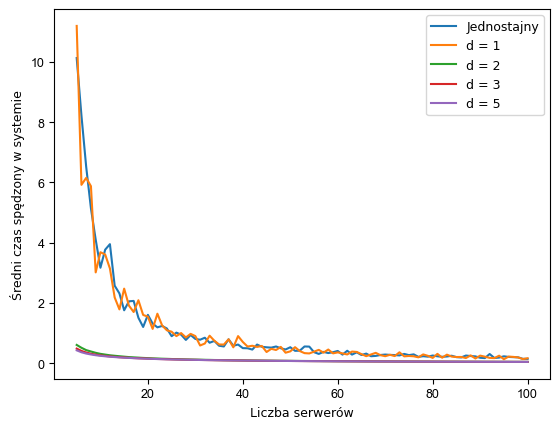

In [39]:
plot_combined(read_all_experiments_data(path_plot), '0.5', 's2_uss_different_2')
plot_combined(read_all_experiments_data(path_plot), '0.8', 's2_uss_different_2')
plot_combined(read_all_experiments_data(path_plot), '0.9', 's2_uss_different_2')
plot_combined(read_all_experiments_data(path_plot), '0.99', 's2_uss_different_2')

### Service_rates = 0.1 and 1.0 for n/2

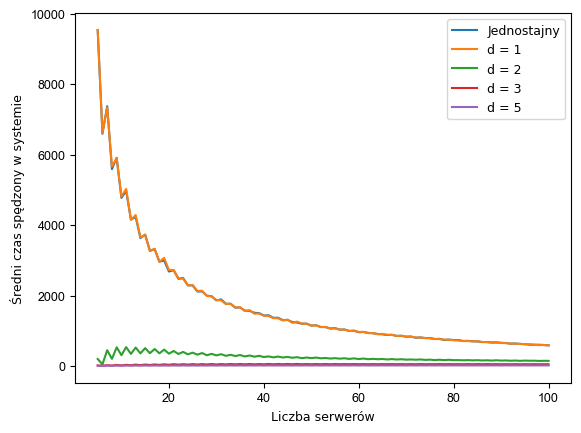

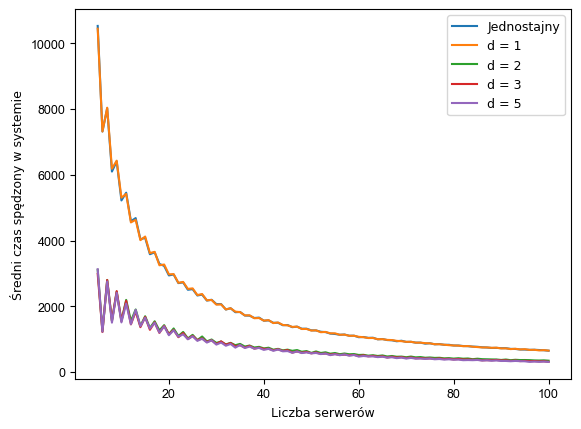

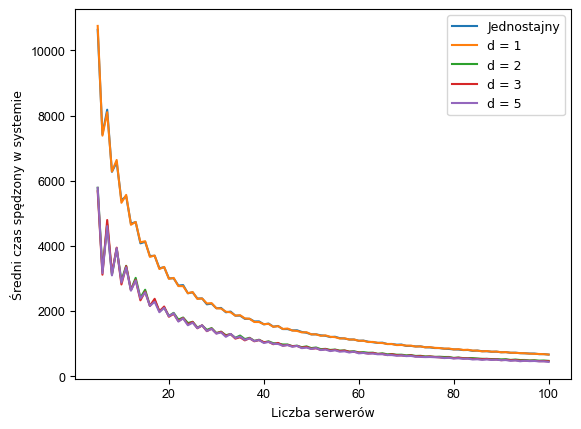

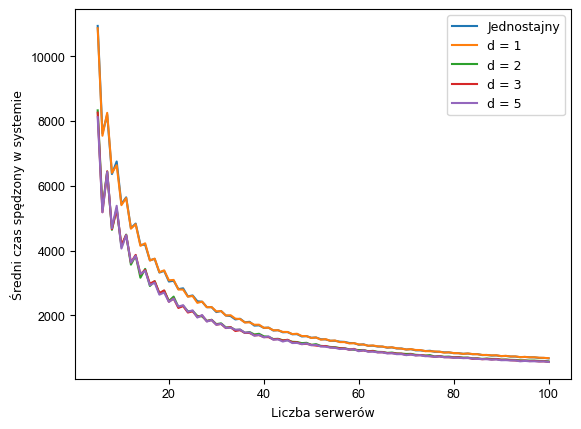

In [61]:
plot_combined(read_all_experiments_data(path_plot), '0.5', 's2_uss_different_3')
plot_combined(read_all_experiments_data(path_plot), '0.8', 's2_uss_different_3')
plot_combined(read_all_experiments_data(path_plot), '0.9', 's2_uss_different_3')
plot_combined(read_all_experiments_data(path_plot), '0.99', 's2_uss_different_3')

# Histogram

## Service_rates = 2 ^ i

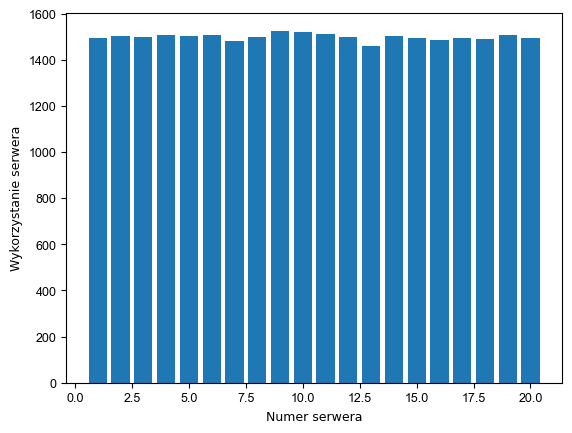

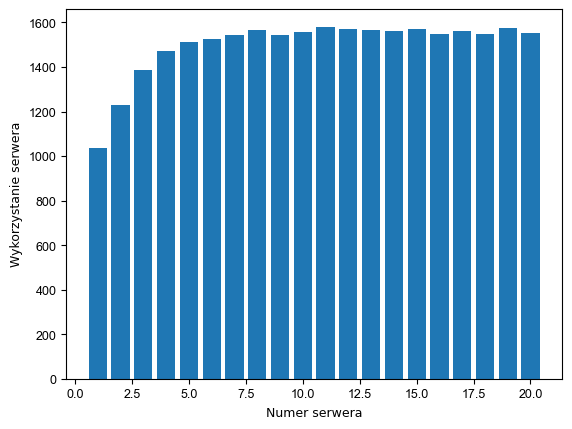

In [55]:
plot_histogram(read_all_experiments_data(path_histogram), '0.999', 'different_1')

## Service_rates = i

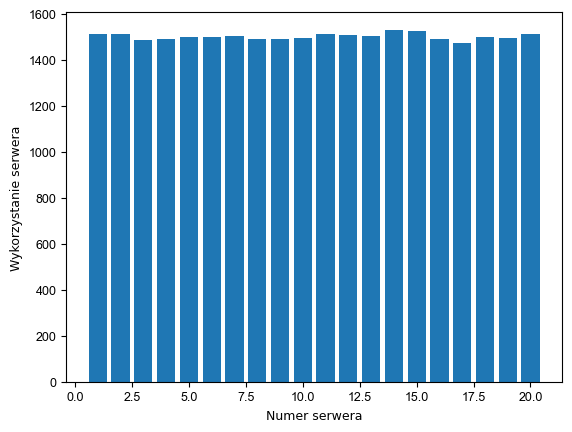

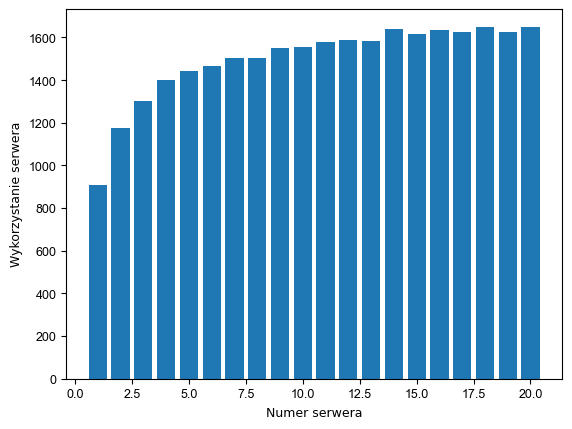

In [62]:
plot_histogram(read_all_experiments_data(path_histogram), '0.999', 'different_2')

## Service_rates = 0.1 and 1.0 for n/2

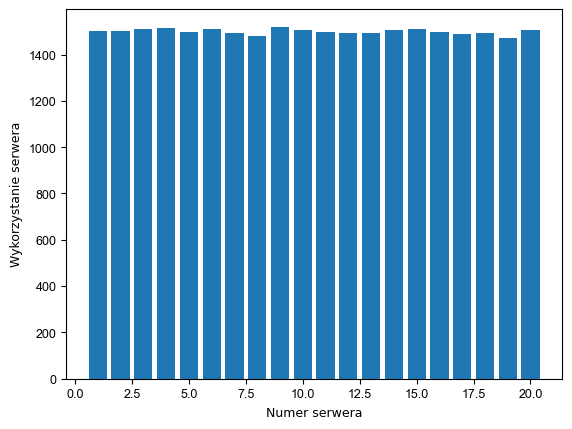

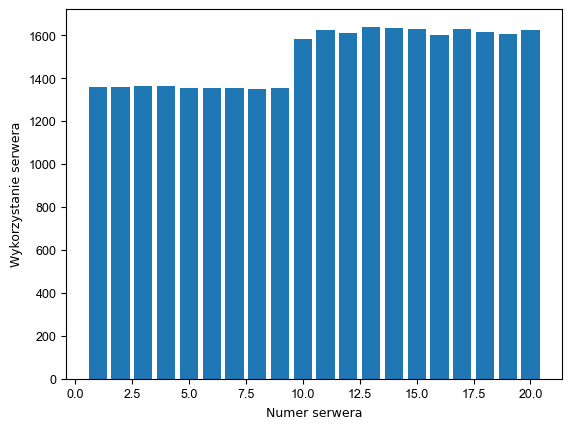

In [57]:
plot_histogram(read_all_experiments_data(path_histogram), '0.999', 'different_3')